# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [223]:
pip install palmerpenguins


In [224]:
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [225]:
# with pipline you contain all the transformation that need to be done to the data
penguins = load_penguins()
penguins= penguins.dropna()

In [226]:
# Define X and y
X = penguins.drop("bill_length_mm", axis=1)
y = penguins["bill_length_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [227]:
y_train

44     37.0
337    46.8
74     35.5
37     42.2
187    48.4
       ... 
55     41.4
321    50.8
18     34.4
112    39.7
179    47.8
Name: bill_length_mm, Length: 249, dtype: float64

In [228]:
## preprocessing: One-Hot_encoding
## model spec: linear regressions
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

# prepping your preprocessing
lr = LinearRegression() # create lieanr object
enc= OneHotEncoder()
ct= ColumnTransformer(
    [("dummify_s", enc,["species"]),  # put everything you want to dummify into a list
    ("dummify_i", enc,["island"]),
    ("dummify_sex", enc,["sex"])]

)

# pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# put them together into a pipline
my_pipeline = Pipeline([("Dummify everything",ct), ("ols",lr)]) # naming the steps so first we trasnforma data and the fit linear regression to it


In [229]:
# enc.fit_transform(penguins[["species"]]) # why 2 brackets
# you need to specfiy which colsumns to transform
my_pipeline

Pipeline(steps=[('Dummify everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [230]:
fitted = my_pipeline.fit(X_train, y_train) # many values means too many columns

In [231]:
fitted

Pipeline(steps=[('Dummify everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [232]:
y_preds= fitted.predict(X_test)

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

- there is a way to do it mannuall and then thorugh python

# Practice

In [233]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

In [234]:
# Define X and y
X = penguins[["bill_length_mm"]]  # you need to add 2 brackets since it is a pandas data frame
y = penguins["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [235]:
X_train

,bill_length_mm
75,42.8
171,48.7
148,36.0
44,37.0
213,46.2
...,...
312,47.6
282,46.1
193,49.6
219,49.5


In [236]:
# Linear model
## preprocessing: Quadratic
## model spec: Polynomial regressions


# prepping your preprocessing
lr = LinearRegression() # create lieanr object
# since we specifed which columns we wanted in defined our X train and X test we don't need to do column transformer


# put them together into a pipline which does the preprocessing steps
my_pipeline = Pipeline([("ols",lr)]) # naming the steps so first we trasnforma data and the fit linear regression to it


In [237]:
fitted = my_pipeline.fit(X_train, y_train)
fitted

Pipeline(steps=[('ols', LinearRegression())])

In [238]:
y_preds= fitted.predict(X_test)

In [266]:
X_test["ols"]= y_preds

In [267]:
X_test

,bill_length_mm,ols
285,51.3,16.588882
276,46.5,16.953851
229,51.1,16.604089
135,41.1,17.364441
286,46.6,16.946247
...,...,...
291,50.5,16.649710
0,39.1,17.516511
322,50.1,16.680124
186,49.1,16.756159


In [270]:
# Quadratic (degree 2 polynomial) model
## preprocessing: Quadratic
## model spec: Polynomial regressions


# prepping your preprocessing
lr = LinearRegression() # create lieanr object
ct= ColumnTransformer([("square",PolynomialFeatures(degree=2, include_bias=False),["bill_length_mm"])])
# since we specifed which columns we wanted in defined our X train and X test we don't need to do column transformer


# put them together into a pipline which does the preprocessing steps
my_pipeline1 = Pipeline([("Polynomial Features", ct),("ols",lr)]) # naming the steps so first we trasnforma data and the fit linear regression to it



In [271]:
fitted1 = my_pipeline1.fit(X_train, y_train)
fitted1

Pipeline(steps=[('Polynomial Features',
                 ColumnTransformer(transformers=[('square',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['bill_length_mm'])])),
                ('ols', LinearRegression())])

In [272]:
y_preds1= fitted1.predict(X_test)

In [274]:
X_test["qudratic"]=y_preds1
X_test

,bill_length_mm,ols,qudratic
285,51.3,16.588882,16.964715
276,46.5,16.953851,16.531782
229,51.1,16.604089,16.930908
135,41.1,17.364441,16.988752
286,46.6,16.946247,16.532746
...,...,...,...
291,50.5,16.649710,16.837715
0,39.1,17.516511,17.411658
322,50.1,16.680124,16.782441
186,49.1,16.756159,16.668252


In [285]:
# Cubic (degree 3 polynomial) model
## preprocessing: Quadratic
## model spec: Polynomial regressions


# prepping your preprocessing
lr = LinearRegression() # create lieanr object
ct= ColumnTransformer([("cubed",PolynomialFeatures(degree=3, include_bias=False),["bill_length_mm"])])
# since we specifed which columns we wanted in defined our X train and X test we don't need to do column transformer


# put them together into a pipline which does the preprocessing steps
my_pipeline1 = Pipeline([("cubed", ct),("ols",lr)]) # naming the steps so first we trasnforma data and the fit linear regression to it


In [286]:
fitted2 = my_pipeline1.fit(X_train, y_train)
fitted2

Pipeline(steps=[('cubed',
                 ColumnTransformer(transformers=[('cubed',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False),
                                                  ['bill_length_mm'])])),
                ('ols', LinearRegression())])

In [287]:
y_preds2= fitted2.predict(X_test)

In [288]:
X_test["cubed"]=y_preds2

In [289]:
X_test

,bill_length_mm,ols,qudratic,cubed
285,51.3,16.588882,16.964715,16.762394
276,46.5,16.953851,16.531782,16.338908
229,51.1,16.604089,16.930908,16.700712
135,41.1,17.364441,16.988752,17.382299
286,46.6,16.946247,16.532746,16.329521
...,...,...,...,...
291,50.5,16.649710,16.837715,16.542534
0,39.1,17.516511,17.411658,17.811064
322,50.1,16.680124,16.782441,16.458499
186,49.1,16.756159,16.668252,16.317695


In [290]:
# Degree (degree 10 polynomial) model
## preprocessing: Quadratic
## model spec: Polynomial regressions


# prepping your preprocessing
lr = LinearRegression() # create lieanr object
ct= ColumnTransformer([("degree=10",PolynomialFeatures(degree=10, include_bias=False),["bill_length_mm"])])
# since we specifed which columns we wanted in defined our X train and X test we don't need to do column transformer


# put them together into a pipline which does the preprocessing steps
my_pipeline2 = Pipeline([("degree=10", ct),("ols",lr)]) # naming the steps so first we trasnforma data and the fit linear regression to it


In [291]:
fitted3 = my_pipeline2.fit(X_train, y_train)
fitted3

Pipeline(steps=[('degree=10',
                 ColumnTransformer(transformers=[('degree=10',
                                                  PolynomialFeatures(degree=10,
                                                                     include_bias=False),
                                                  ['bill_length_mm'])])),
                ('ols', LinearRegression())])

In [314]:
y_preds3= fitted3.predict(X_test)
X_test["degree_10"]=y_preds3

In [315]:
X_test

,bill_length_mm,ols,qudratic,cubed,degree_10,y_test
285,51.3,16.588882,16.964715,16.762394,17.864339,19.9
276,46.5,16.953851,16.531782,16.338908,15.482376,17.9
229,51.1,16.604089,16.930908,16.700712,17.737775,16.3
135,41.1,17.364441,16.988752,17.382299,17.812435,17.5
286,46.6,16.946247,16.532746,16.329521,15.484594,17.8
...,...,...,...,...,...,...
291,50.5,16.649710,16.837715,16.542534,17.328676,19.6
0,39.1,17.516511,17.411658,17.811064,18.477000,18.7
322,50.1,16.680124,16.782441,16.458499,17.044788,17.9
186,49.1,16.756159,16.668252,16.317695,16.367565,14.8


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

In [304]:
X_test["y_test"]= y_test
X_test

,bill_length_mm,ols,qudratic,cubed,degree_10,y_test
285,51.3,16.588882,16.964715,16.762394,16.762394,19.9
276,46.5,16.953851,16.531782,16.338908,16.338908,17.9
229,51.1,16.604089,16.930908,16.700712,16.700712,16.3
135,41.1,17.364441,16.988752,17.382299,17.382299,17.5
286,46.6,16.946247,16.532746,16.329521,16.329521,17.8
...,...,...,...,...,...,...
291,50.5,16.649710,16.837715,16.542534,16.542534,19.6
0,39.1,17.516511,17.411658,17.811064,17.811064,18.7
322,50.1,16.680124,16.782441,16.458499,16.458499,17.9
186,49.1,16.756159,16.668252,16.317695,16.317695,14.8


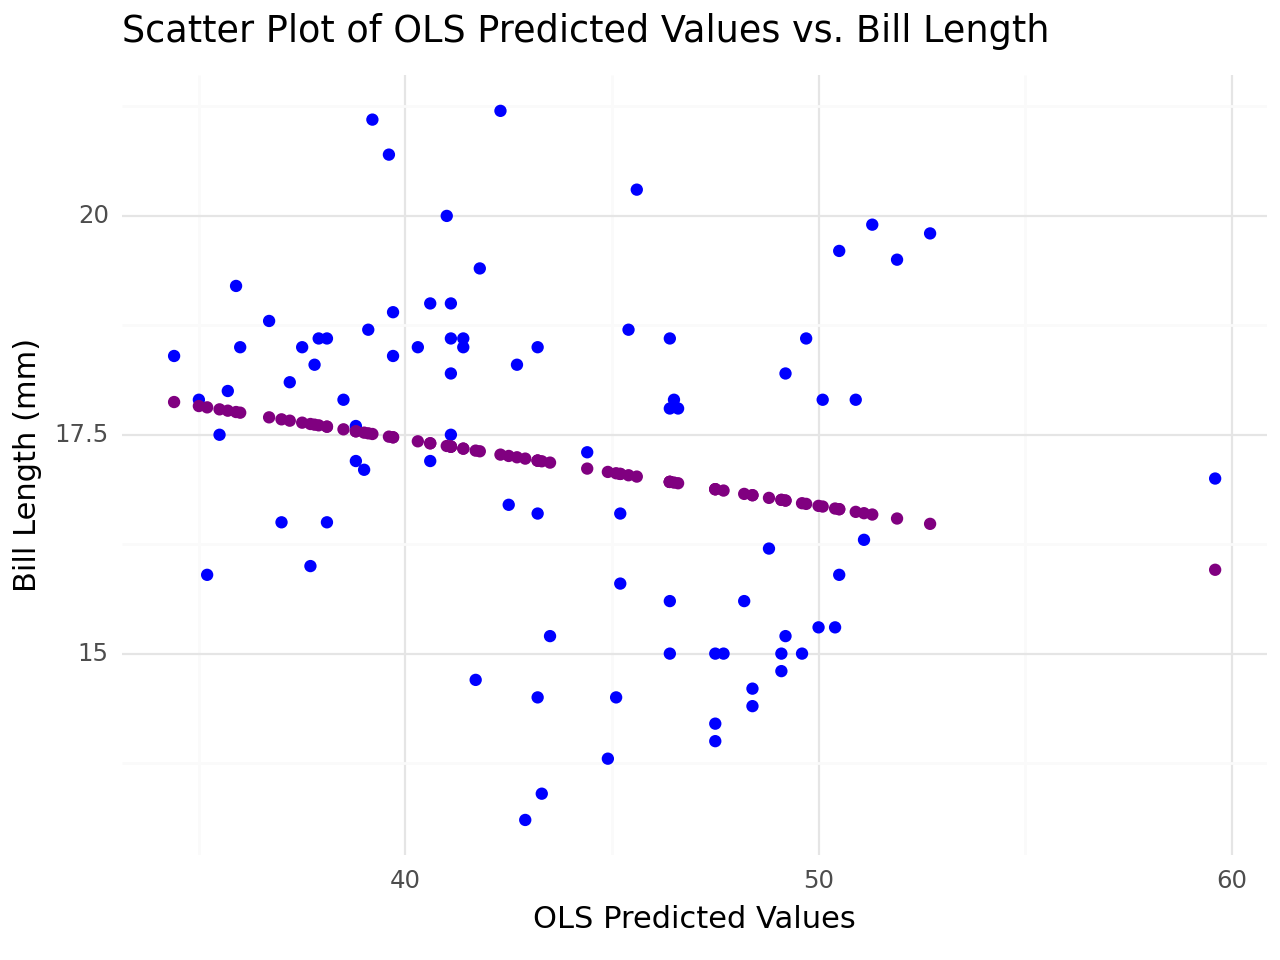

<Figure Size: (640 x 480)>

In [310]:
from plotnine import *

# Create a scatter plot
scatter_plot = (
    ggplot(X_test, aes(x='bill_length_mm')) +
    geom_point(aes(y="y_test"), color='blue') +
    geom_point(aes(y="ols"), color='purple')+
    labs(x='OLS Predicted Values', y='Bill Length (mm)') +
    ggtitle('Scatter Plot of OLS Predicted Values vs. Bill Length') +
    theme_minimal()
)

# Display the scatter plot
scatter_plot


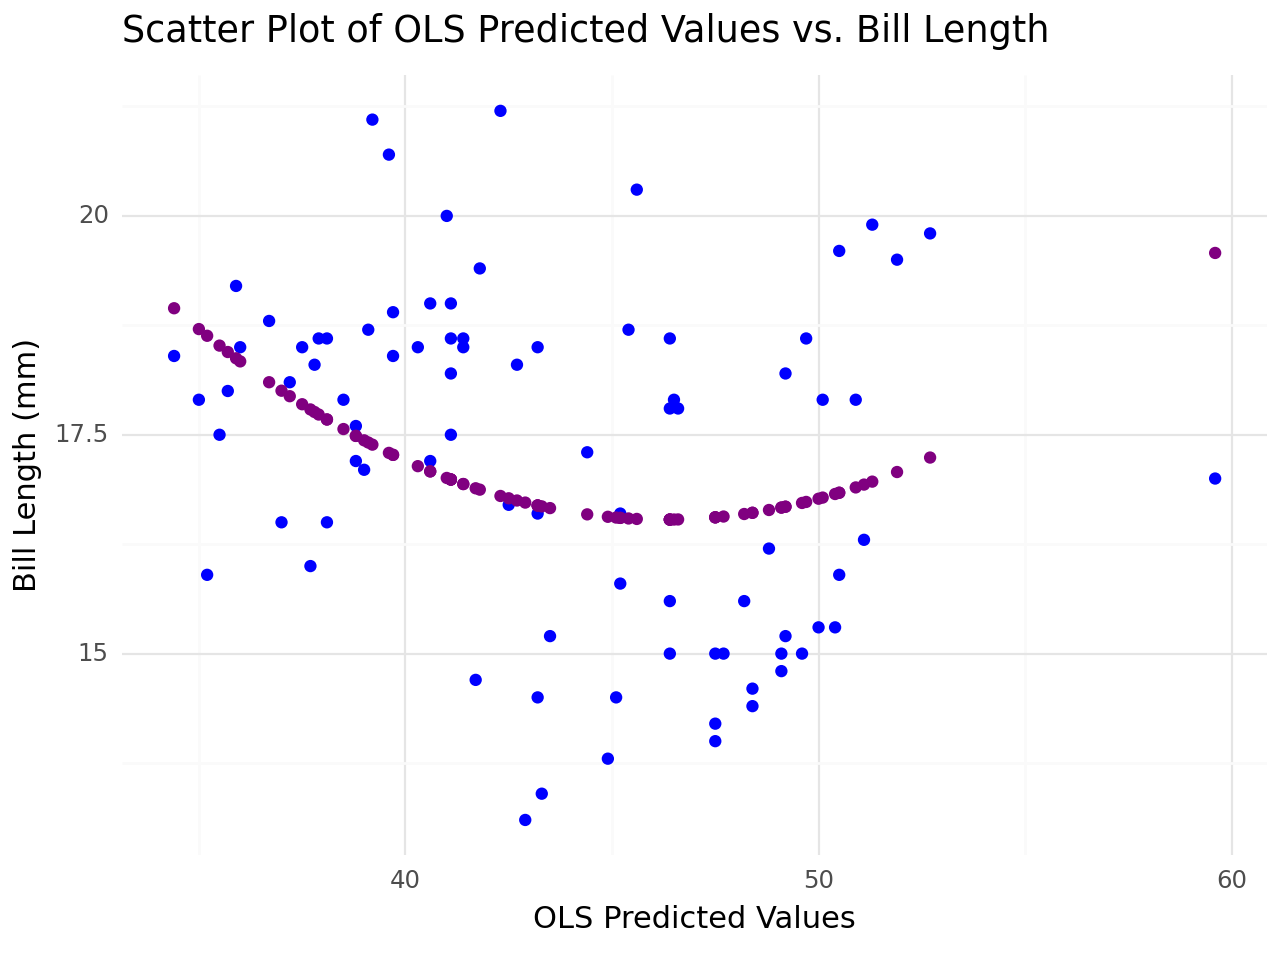

<Figure Size: (640 x 480)>

In [311]:
# graph for squared
from plotnine import *

# Create a scatter plot
scatter_plot = (
    ggplot(X_test, aes(x='bill_length_mm')) +
    geom_point(aes(y="y_test"), color='blue') +
    geom_point(aes(y="qudratic"), color='purple')+
    labs(x='OLS Predicted Values', y='Bill Length (mm)') +
    ggtitle('Scatter Plot of OLS Predicted Values vs. Bill Length') +
    theme_minimal()
)

# Display the scatter plot
scatter_plot

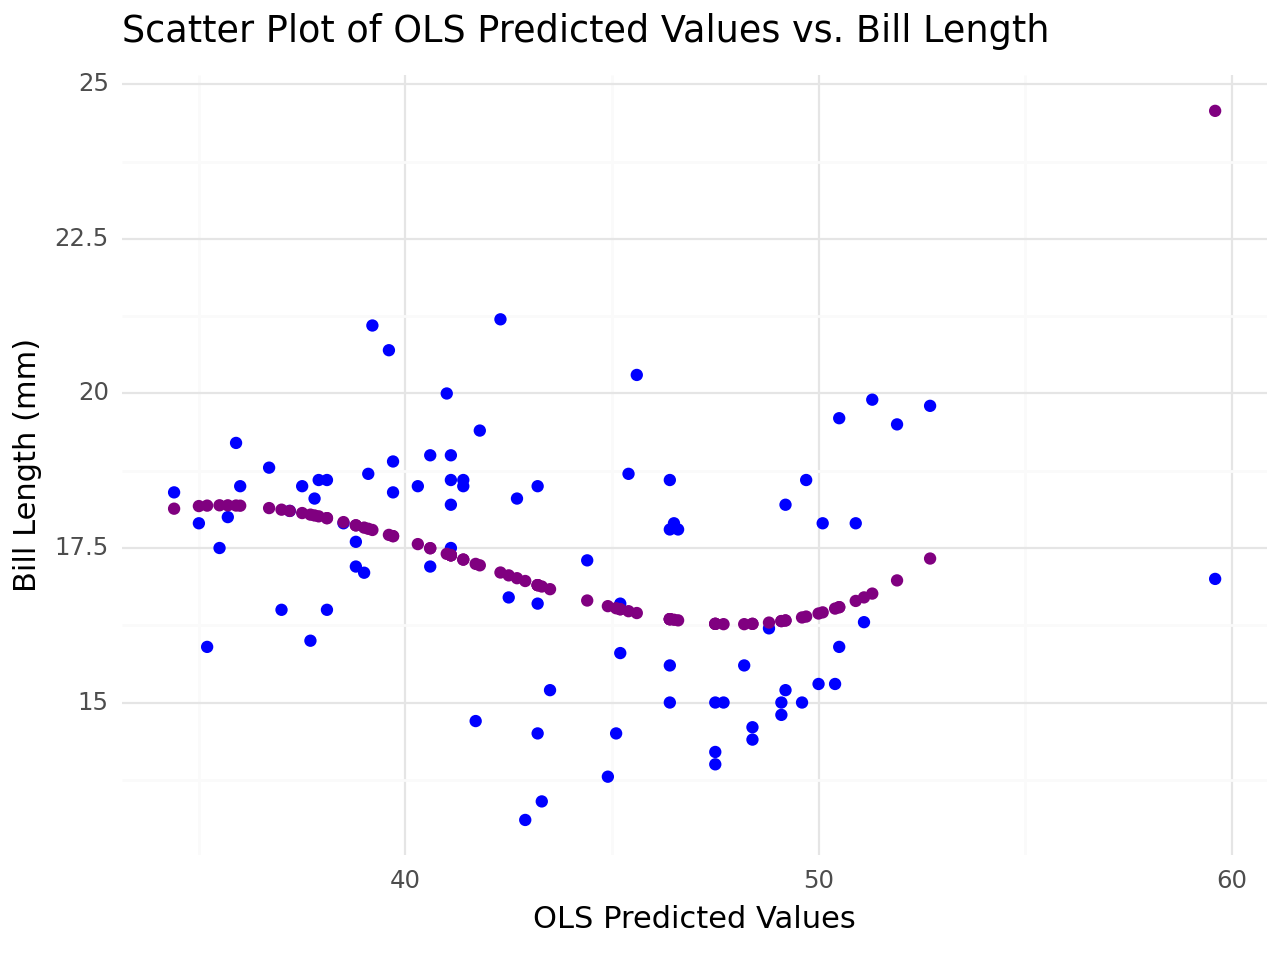

<Figure Size: (640 x 480)>

In [312]:
# graph for cubic
# graph for squared
from plotnine import *

# Create a scatter plot
scatter_plot = (
    ggplot(X_test, aes(x='bill_length_mm')) +
    geom_point(aes(y="y_test"), color='blue') +
    geom_point(aes(y="cubed"), color='purple')+
    labs(x='OLS Predicted Values', y='Bill Length (mm)') +
    ggtitle('Scatter Plot of OLS Predicted Values vs. Bill Length') +
    theme_minimal()
)

# Display the scatter plot
scatter_plot

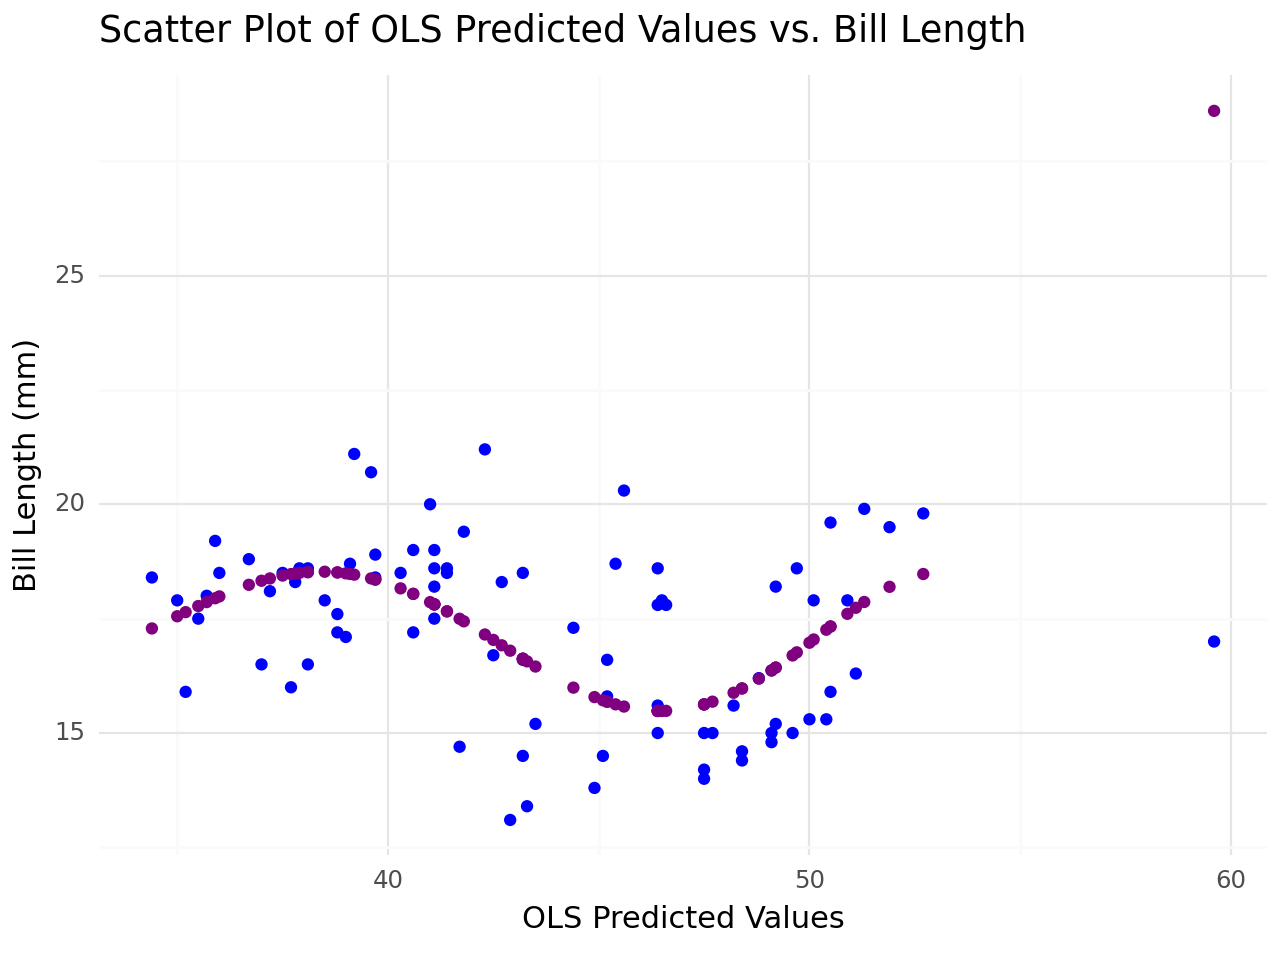

<Figure Size: (640 x 480)>

In [316]:
# graph for degree=10
# graph for squared
from plotnine import *

# Create a scatter plot
scatter_plot = (
    ggplot(X_test, aes(x='bill_length_mm')) +
    geom_point(aes(y="y_test"), color='blue') +
    geom_point(aes(y="degree_10"), color='purple')+
    labs(x='OLS Predicted Values', y='Bill Length (mm)') +
    ggtitle('Scatter Plot of OLS Predicted Values vs. Bill Length') +
    theme_minimal()
)

# Display the scatter plot
scatter_plot

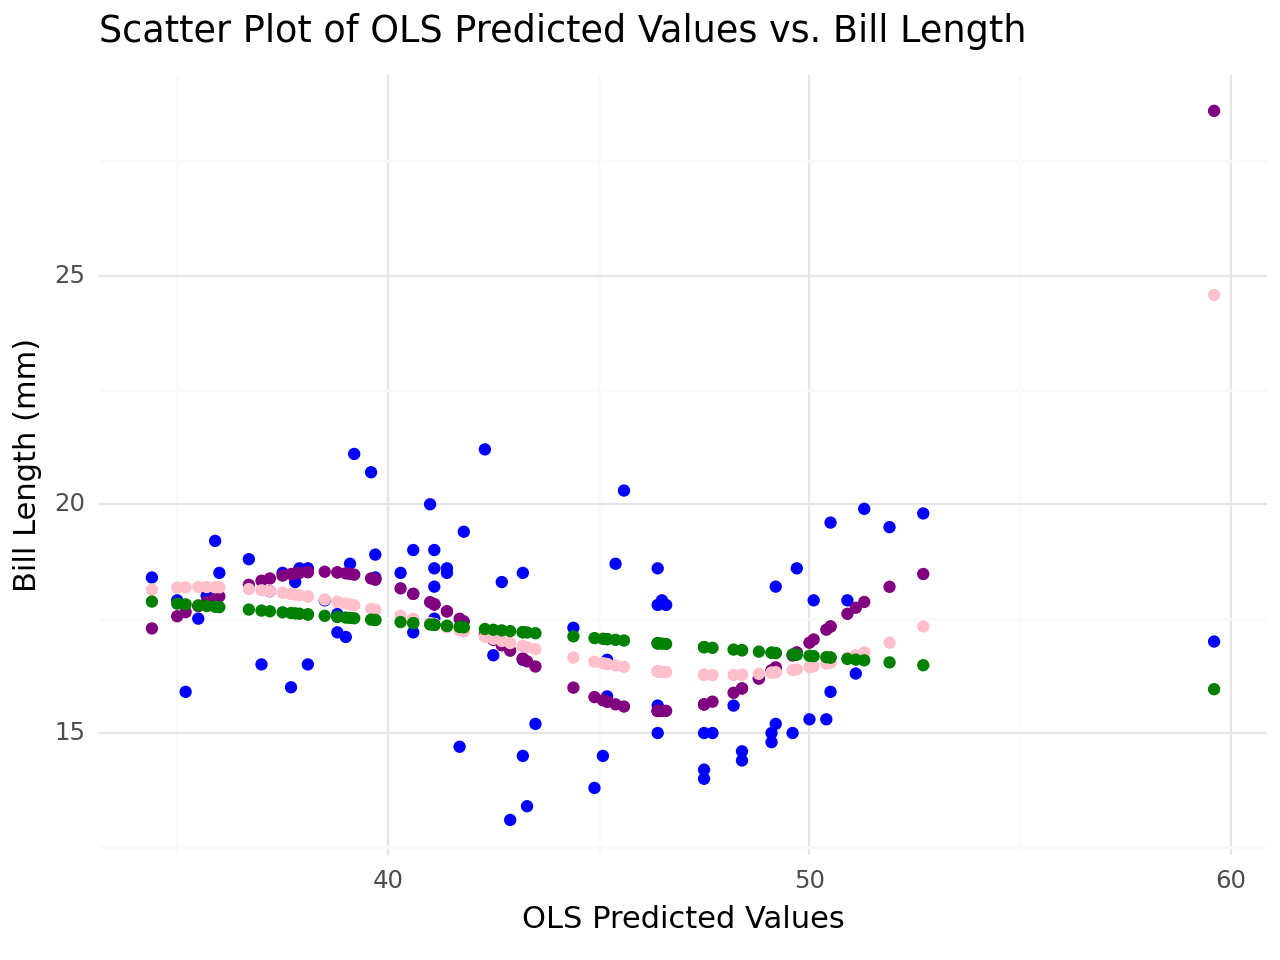

<Figure Size: (640 x 480)>

In [317]:
# Create a scatter plot
scatter_plot = (
    ggplot(X_test, aes(x='bill_length_mm')) +
    geom_point(aes(y="y_test"), color='blue') +
    geom_point(aes(y="degree_10"), color='purple')+
    geom_point(aes(y="cubed"), color='pink')+
    geom_point(aes(y="ols"), color='green')+
    labs(x='OLS Predicted Values', y='Bill Length (mm)') +
    ggtitle('Scatter Plot of OLS Predicted Values vs. Bill Length') +
    theme_minimal()
)
scatter_plot

The model with degree 10 polynomial features seems to be excessively fitting the data, closely matching the actual values, which could lead to poor generalization on new data. Conversely, the cubic model strikes a more balanced approach in capturing the underlying data patterns, making it a preferable choice for predictive tasks due to its moderate level of flexibility and better potential for handling unseen data.